In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# korean font setting
import platform

if platform.system() == 'Darwin': # macOS
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')

plt.rcParams['axes.unicode_minus'] = False

In [13]:
df = pd.read_csv('./data/신용카드VIP회원정보.csv')
df.head()

,기준년월,발급회원번호,연령,VIP등급코드,회원여부_이용가능,회원여부_연체,탈회횟수_누적,최종탈회후경과월,탈회횟수_발급1년이내,거주시도명,...,컨택건수_이용유도_LMS_B0M,컨택건수_이용유도_EM_B0M,컨택건수_이용유도_청구서_B0M,컨택건수_이용유도_인터넷_B0M,컨택건수_이용유도_당사앱_B0M,증감율_이용건수_신용_전월,증감율_이용금액_신용_전월,증감율_이용건수_신용_분기,증감율_이용금액_신용_분기,변동률_잔액_B1M
0,201807,SYN_0,40대,7,1,0,1,61,0,경기,...,2,13,0,0,0,0.454549,0.409767,-0.476454,-0.411320,0.261886
1,201807,SYN_8,20대,7,1,0,0,0,0,충남,...,2,13,0,1,0,-0.272107,0.137583,0.464710,0.228002,-0.241684
2,201807,SYN_9,30대,6,1,0,0,0,0,경기,...,2,3,1,1,0,0.291142,0.329639,-0.345280,-0.061798,0.273881
3,201807,SYN_17,70대이상,7,1,0,0,0,0,경기,...,0,0,0,1,0,-0.021992,0.304045,0.057209,-0.196456,0.131636
4,201807,SYN_18,40대,7,1,0,0,0,0,경기,...,0,0,0,0,0,0.000000,0.000103,-2.000000,-2.000000,0.093721


In [14]:
df.describe()

,기준년월,VIP등급코드,회원여부_이용가능,회원여부_연체,탈회횟수_누적,최종탈회후경과월,탈회횟수_발급1년이내,유효카드수_신용,이용카드수_신용,이용금액_R3M_신용,...,컨택건수_이용유도_LMS_B0M,컨택건수_이용유도_EM_B0M,컨택건수_이용유도_청구서_B0M,컨택건수_이용유도_인터넷_B0M,컨택건수_이용유도_당사앱_B0M,증감율_이용건수_신용_전월,증감율_이용금액_신용_전월,증감율_이용건수_신용_분기,증감율_이용금액_신용_분기,변동률_잔액_B1M
count,3.585552e+06,3.585552e+06,3.585552e+06,3.585552e+06,3.585552e+06,3.585552e+06,3.585552e+06,3.585552e+06,3.585552e+06,3.585552e+06,...,3.585552e+06,3.585552e+06,3.585552e+06,3.585552e+06,3.585552e+06,3.585552e+06,3.585552e+06,3.585552e+06,3.585552e+06,3.585552e+06
mean,2.018095e+05,6.725667e+00,9.907032e-01,2.511134e-02,4.157764e-01,2.711485e+01,4.741055e-02,2.116356e+00,1.852093e+00,3.978863e+06,...,7.338583e-01,2.993938e+00,4.019041e-01,1.899518e-01,8.004346e-05,-2.261168e-02,1.284982e-01,-7.530663e-02,-1.526491e-01,-7.978208e-03
std,1.707825e+00,4.618601e-01,9.597046e-02,1.564633e-01,5.958068e-01,4.023546e+01,2.125154e-01,1.158315e+00,1.054424e+00,3.145076e+06,...,9.880758e-01,5.077093e+00,6.155430e-01,3.922629e-01,1.036190e-02,2.476041e-01,3.949027e-01,4.170521e-01,4.474346e-01,1.888849e-01
min,2.018070e+05,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-7.450620e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,-2.004693e+00,-2.092054e+00,-2.490937e+00,-2.000000e+00
25%,2.018080e+05,6.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.502386e+06,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.039447e-01,1.602828e-04,-2.337303e-01,-3.571151e-01,-9.836113e-02
50%,2.018095e+05,7.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.256341e+06,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.013186e-02,2.297760e-01,-4.926695e-02,-1.346057e-01,-3.800396e-03
75%,2.018110e+05,7.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,4.800000e+01,0.000000e+00,3.000000e+00,3.000000e+00,5.968580e+06,...,2.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,5.450066e-02,2.732548e-01,1.101320e-01,6.101701e-02,7.384734e-02
max,2.018120e+05,7.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.190000e+02,1.000000e+00,5.000000e+00,5.000000e+00,1.654764e+07,...,3.000000e+00,1.400000e+01,2.000000e+00,1.000000e+00,4.000000e+00,2.000000e+00,2.004218e+00,2.067573e+00,2.394163e+00,2.000000e+00


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3585552 entries, 0 to 3585551
Data columns (total 67 columns):
 #   Column             Dtype  
---  ------             -----  
 0   기준년월               int64  
 1   발급회원번호             object 
 2   연령                 object 
 3   VIP등급코드            int64  
 4   회원여부_이용가능          int64  
 5   회원여부_연체            int64  
 6   탈회횟수_누적            int64  
 7   최종탈회후경과월           int64  
 8   탈회횟수_발급1년이내        int64  
 9   거주시도명              object 
 10  유효카드수_신용           int64  
 11  이용카드수_신용           int64  
 12  이용금액_R3M_신용        int64  
 13  _1순위카드이용금액         int64  
 14  _1순위카드이용건수         int64  
 15  _2순위카드이용금액         int64  
 16  _2순위카드이용건수         int64  
 17  Life_Stage         object 
 18  CA이자율_할인전          float64
 19  강제한도감액금액_R12M      int64  
 20  한도증액금액_R12M        int64  
 21  연체감액여부_R3M         int64  
 22  시장단기연체여부_R3M       int64  
 23  최종이용일자_신판          int64  
 24  이용건수_신용_B0M        int64  
 25  이용금액_신용_B0M        int6

In [16]:
df.isnull().sum()

기준년월              0
발급회원번호            0
연령                0
VIP등급코드           0
회원여부_이용가능         0
                 ..
증감율_이용건수_신용_전월    0
증감율_이용금액_신용_전월    0
증감율_이용건수_신용_분기    0
증감율_이용금액_신용_분기    0
변동률_잔액_B1M        0
Length: 67, dtype: int64

In [17]:
df.columns

Index(['기준년월', '발급회원번호', '연령', 'VIP등급코드', '회원여부_이용가능', '회원여부_연체', '탈회횟수_누적',
       '최종탈회후경과월', '탈회횟수_발급1년이내', '거주시도명', '유효카드수_신용', '이용카드수_신용',
       '이용금액_R3M_신용', '_1순위카드이용금액', '_1순위카드이용건수', '_2순위카드이용금액', '_2순위카드이용건수',
       'Life_Stage', 'CA이자율_할인전', '강제한도감액금액_R12M', '한도증액금액_R12M', '연체감액여부_R3M',
       '시장단기연체여부_R3M', '최종이용일자_신판', '이용건수_신용_B0M', '이용금액_신용_B0M', '이용후경과월_신용',
       '이용건수_신용_R12M', '이용금액_신용_R12M', '이용가맹점수', '이용금액_업종기준', '이용금액_쇼핑',
       '이용금액_요식', '이용금액_교통', '이용금액_의료', '이용금액_납부', '이용금액_교육', '이용금액_여유생활',
       '이용금액_사교활동', '이용금액_일상생활', '이용금액_해외', 'RP건수_B0M', 'RP금액_B0M', '이용금액대',
       '포인트_잔여포인트_B0M', '마일_잔여포인트_B0M', '잔액_B0M_x', '연체일수_B2M_x', '월중평잔_x',
       '평잔_3M_x', '평잔_6M_x', '잔액_B0M_y', '연체일수_B2M_y', '월중평잔_y', '평잔_3M_y',
       '평잔_6M_y', '컨택건수_이용유도_TM_B0M', '컨택건수_이용유도_LMS_B0M', '컨택건수_이용유도_EM_B0M',
       '컨택건수_이용유도_청구서_B0M', '컨택건수_이용유도_인터넷_B0M', '컨택건수_이용유도_당사앱_B0M',
       '증감율_이용건수_신용_전월', '증감율_이용금액_신용_전월', '증감율_이용건수_신용_분기', '증감율_이용금액_신용_분기',
       '변동률_잔액

In [18]:
df['연체일수_B2M_x']
df['기준년월']

0          201807
1          201807
2          201807
3          201807
4          201807
            ...  
3585547    201812
3585548    201812
3585549    201812
3585550    201812
3585551    201812
Name: 기준년월, Length: 3585552, dtype: int64

## date

In [19]:
df['최종이용일자_신판'] = pd.to_datetime(df['최종이용일자_신판'])
df['기준년월'] = pd.to_datetime(df['기준년월'])


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/var/folders/wb/bbyhbcc95_l7p6410jysv6tm0000gn/T/ipykernel_16099/311174968.py:9: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/wb/bbyhbcc95_l7p6410jysv6tm0000gn/T/ipykernel_16099/311174968.py:9: UserWarning: Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/wb/bbyhbcc95_l7p6410jysv6tm0000gn/T/ipykernel_16099/311174968.py:9: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/wb/bbyhbcc95_l7p6410jysv6tm0000gn/T/ipykernel_16099/311174968.py:9: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing fro

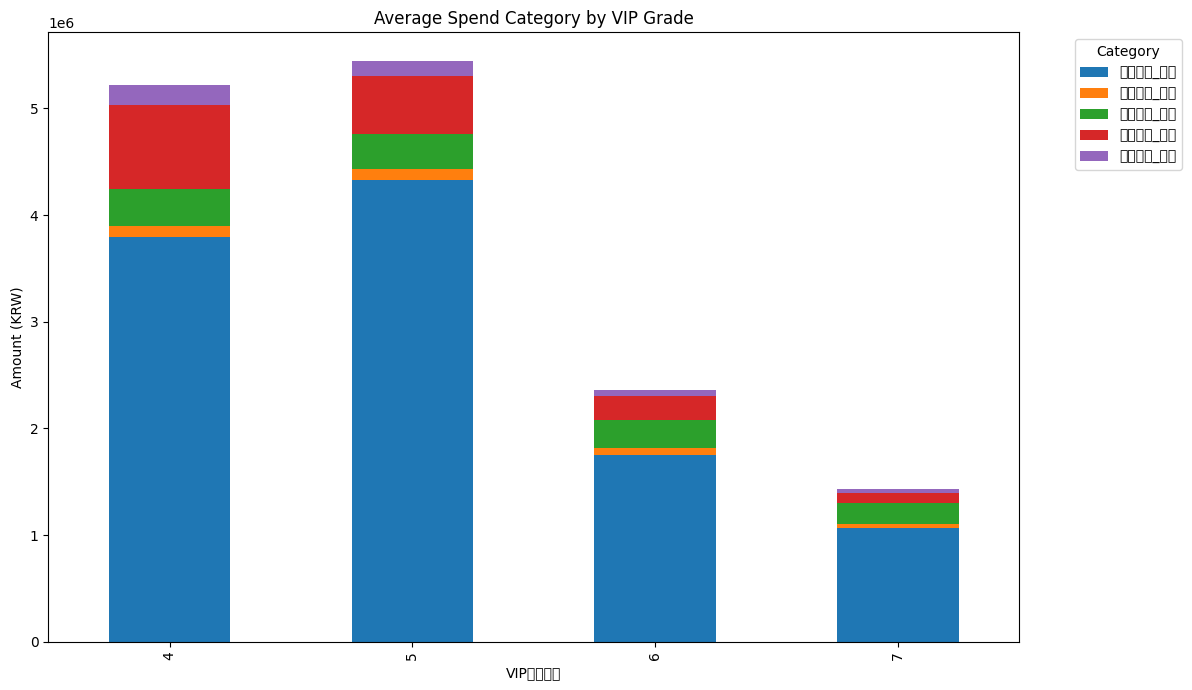

In [27]:
# 1. VIP Category Spending Breakdown
category_cols = ['이용금액_쇼핑', '이용금액_요식', '이용금액_교통', '이용금액_의료', '이용금액_해외']
vip_spend = df.groupby('VIP등급코드')[category_cols].mean()

vip_spend.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Average Spend Category by VIP Grade')
plt.ylabel('Amount (KRW)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [ ]:
# 2. Relationship: Spending Velocity vs. Recency
# Tracking '증감율_이용금액_신용_전월' (Spending Growth) vs '이용후경과월_신용' (Months since last use)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='이용후경과월_신용', y='증감율_이용금액_신용_전월', 
                hue='VIP등급코드', size='이용금액_신용_B0M', sizes=(20, 200), alpha=0.6)
plt.axhline(0, color='red', linestyle='--') # The "Churn Line" - anyone below is spending less
plt.title('Spending Velocity vs. Inactivity (Recency)')
plt.show()

# 3. Delinquency (연체) Impact on Spending
# Seeing if users with '연체일수' (Overdue days) are cutting back on discretionary spend
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='연체일수_B2M_x', y='이용금액_일상생활', scatter_kws={'alpha':0.3})
plt.title('Impact of Overdue Days on Daily Life Spending')
plt.show()

# 4. Life Stage Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Life_Stage', y='이용금액_신용_R12M', palette='husl')
plt.yscale('log') # Use log scale if spending has high variance
plt.title('12-Month Total Spend by Life Stage')
plt.xticks(rotation=45)
plt.show()

'기준년월'
'발급회원번호',
'연령' 
'VIP등급코드'
'회원여부_이용가능' Y
'회원여부_연체'
'탈회횟수_누적'
'최종탈회후경과월'
'탈회횟수_발급1년이내
'거주시도명'
'유효카드수_신용'
'이용카드수_신용'
'이용금액_R3M_신용'
'_1순위카드이용금액'
'_1순위카드이용건수'
'_2순위카드이용금액'
'_2순위카드이용건수'
'Life_Stage'
'CA이자율_할인전'
'강제한도감액금액_R12M'
'한도증액금액_R12M'
'연체감액여부_R3M'
'시장단기연체여부_R3M'
'최종이용일자_신판'
'이용건수_신용_B0M'
'이용금액_신용_B0M'
'이용후경과월_신용'
'이용건수_신용_R12M'
'이용금액_신용_R12M'
'이용가맹점수'
'이용금액_업종기준'
'이용금액_쇼핑'
'이용금액_요식'
'이용금액_교통'
'이용금액_의료'
'이용금액_납부'
'이용금액_교육'
'이용금액_여유생활'
'이용금액_사교활동'
'이용금액_일상생활'
'이용금액_해외'
'RP건수_B0M'
'RP금액_B0M'
'이용금액대'
'포인트_잔여포인트_B0M'
'마일_잔여포인트_B0M'
'잔액_B0M_x'
'연체일수_B2M_x'
'월중평잔_x'
'평잔_3M_x'
'평잔_6M_x'
'잔액_B0M_y'
'연체일수_B2M_y'
'월중평잔_y'
'평잔_3M_y'
'평잔_6M_y'
'컨택건수_이용유도_TM_B0M'
'컨택건수_이용유도_LMS_B0M'
'컨택건수_이용유도_EM_B0M',
'컨택건수_이용유도_청구서_B0M'
'컨택건수_이용유도_인터넷_B0M'
'컨택건수_이용유도_당사앱_B0M'
'증감율_이용건수_신용_전월'
'증감율_이용금액_신용_전월'
'증감율_이용건수_신용_분기'
'증감율_이용금액_신용_분기'
'변동률_잔액_B1M'